# Biomedical Data Processing and Analysis
## Processing output_cleaned.csv

This notebook processes and analyzes the biomedical dataset containing demographic and health information.

### 1. Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Set plot style
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)

### 2. Load the Data

In [2]:
# Load the CSV file
df = pd.read_csv('data_clearance/output_cleaned.csv')

print(f"Dataset shape: {df.shape}")
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

Dataset shape: (132, 6)
Number of rows: 132
Number of columns: 6


### 3. Initial Data Exploration

In [3]:
# Display first few rows
print("First 10 rows of the dataset:")
df.head(10)

First 10 rows of the dataset:


,Howoldareyou,MaritalStatus,Areyoumaleorfemale,Whatisyourhighestlevelofeducation,Yourbodyweight,Yourheight
0,40.0,single,male,tertiary,84.0,1.70
1,31.0,married,male,tertiary,75.0,1.67
2,25.0,windowed,female,tertiary,65.0,1.60
3,39.0,windowed,male,tertiary,74.0,1.60
4,35.0,single,male,secondary,65.0,2.00
5,30.0,married,female,tertiary,88.2,1.56
6,24.0,married,male,tertiary,65.0,1.67
7,28.0,divorced/separated,male,secondary,73.0,2.00
8,32.0,windowed,female,tertiary,87.0,1.59
9,35.0,single,female,tertiary,59.0,1.60


In [4]:
# Display column information
print("Dataset Information:")
df.info()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132 entries, 0 to 131
Data columns (total 6 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Howoldareyou                       131 non-null    float64
 1   MaritalStatus                      132 non-null    object 
 2   Areyoumaleorfemale                 131 non-null    object 
 3   Whatisyourhighestlevelofeducation  131 non-null    object 
 4   Yourbodyweight                     130 non-null    float64
 5   Yourheight                         128 non-null    float64
dtypes: float64(3), object(3)
memory usage: 6.3+ KB


In [5]:
# Display basic statistics
print("Statistical Summary:")
df.describe()

Statistical Summary:


,Howoldareyou,Yourbodyweight,Yourheight
count,131.000000,130.000000,128.000000
mean,29.992366,72.712308,5.914922
std,6.137522,13.777141,26.656684
min,19.000000,48.000000,1.200000
25%,25.500000,62.250000,1.557500
50%,30.000000,70.500000,1.620000
75%,33.000000,80.000000,1.722500
max,48.000000,110.000000,189.000000


### 4. Data Quality Assessment

Missing Values Analysis:
                                                              Column  \
Howoldareyou                                            Howoldareyou   
MaritalStatus                                          MaritalStatus   
Areyoumaleorfemale                                Areyoumaleorfemale   
Whatisyourhighestlevelofeducation  Whatisyourhighestlevelofeducation   
Yourbodyweight                                        Yourbodyweight   
Yourheight                                                Yourheight   

                                   Missing_Count  Missing_Percentage  
Howoldareyou                                   1            0.757576  
MaritalStatus                                  0            0.000000  
Areyoumaleorfemale                             1            0.757576  
Whatisyourhighestlevelofeducation              1            0.757576  
Yourbodyweight                                 2            1.515152  
Yourheight                                  

<Figure size 1000x600 with 0 Axes>

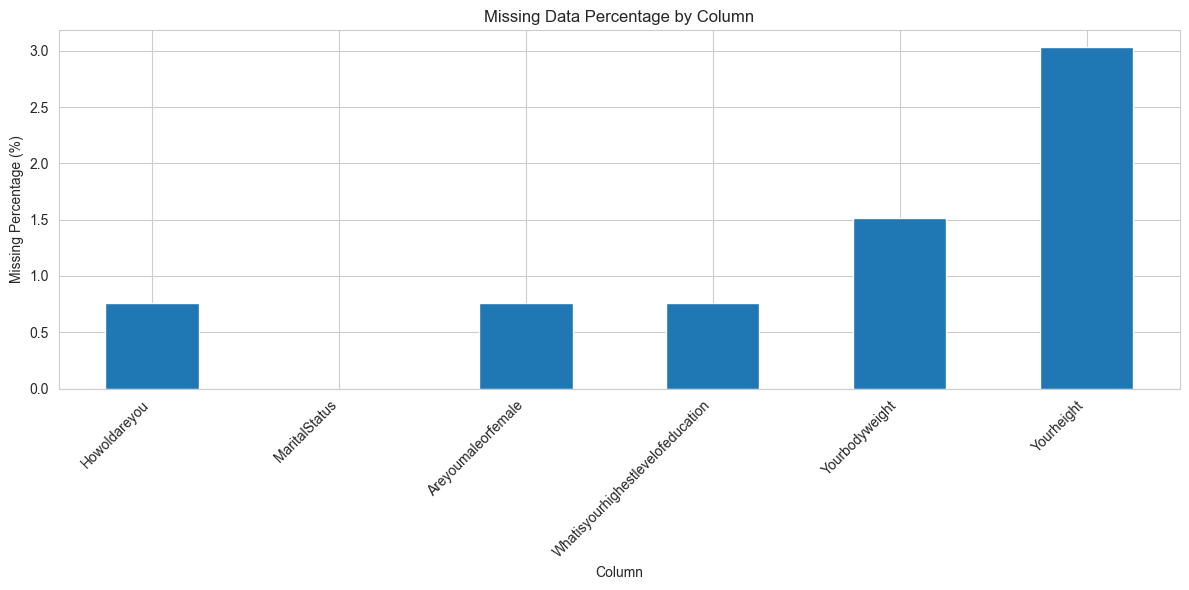

In [6]:
# Check for missing values
print("Missing Values Analysis:")
missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Count': df.isnull().sum(),
    'Missing_Percentage': (df.isnull().sum() / len(df)) * 100
})
print(missing_data)

# Visualize missing data
plt.figure(figsize=(10, 6))
missing_data.plot(x='Column', y='Missing_Percentage', kind='bar', legend=False)
plt.title('Missing Data Percentage by Column')
plt.xlabel('Column')
plt.ylabel('Missing Percentage (%)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [7]:
# Check unique values for categorical columns
print("\nUnique Values in Categorical Columns:")
categorical_cols = ['MaritalStatus', 'Areyoumaleorfemale', 'Whatisyourhighestlevelofeducation']
for col in categorical_cols:
    print(f"\n{col}:")
    print(df[col].value_counts())


Unique Values in Categorical Columns:

MaritalStatus:
MaritalStatus
windowed              35
divorced/separated    35
married               32
single                30
Name: count, dtype: int64

Areyoumaleorfemale:
Areyoumaleorfemale
male      91
female    40
Name: count, dtype: int64

Whatisyourhighestlevelofeducation:
Whatisyourhighestlevelofeducation
tertiary     122
secondary      7
primary        2
Name: count, dtype: int64


### 5. Data Cleaning and Preparation

In [8]:
# Create a copy for cleaning
df_clean = df.copy()

# Rename columns for easier handling
df_clean.columns = ['Age', 'MaritalStatus', 'Gender', 'Education', 'Weight', 'Height']

print("Columns renamed successfully")
print(df_clean.columns.tolist())

Columns renamed successfully
['Age', 'MaritalStatus', 'Gender', 'Education', 'Weight', 'Height']


In [9]:
# Identify and handle height outliers
# Heights > 3 are likely in cm and need conversion to meters
print("Height values analysis:")
print(f"Height range: {df_clean['Height'].min()} - {df_clean['Height'].max()}")
print(f"\nRows with height > 3.0:")
print(df_clean[df_clean['Height'] > 3.0][['Height', 'Weight', 'Age']])

# Convert heights > 3 from cm to meters
df_clean.loc[df_clean['Height'] > 3.0, 'Height'] = df_clean.loc[df_clean['Height'] > 3.0, 'Height'] / 100

print("\nHeight values after conversion:")
print(f"Height range: {df_clean['Height'].min()} - {df_clean['Height'].max()}")

Height values analysis:
Height range: 1.2 - 189.0

Rows with height > 3.0:
     Height  Weight   Age
51    170.0    78.0  34.0
73    172.0    78.0  27.0
76    189.0   103.0  33.0
93     10.0    50.0  22.0
98      5.8    65.0  23.0
103     5.2    70.0  28.0

Height values after conversion:
Height range: 0.052000000000000005 - 3.0


In [10]:
# Calculate BMI (Body Mass Index)
df_clean['BMI'] = df_clean['Weight'] / (df_clean['Height'] ** 2)

print("BMI calculated successfully")
print(f"\nBMI Statistics:")
print(df_clean['BMI'].describe())

BMI calculated successfully

BMI Statistics:
count      128.000000
mean       418.998558
std       2870.079957
min          5.777778
25%         23.437500
50%         27.230759
75%         31.250000
max      25887.573964
Name: BMI, dtype: float64


In [11]:
# Categorize BMI
def categorize_bmi(bmi):
    if pd.isna(bmi):
        return 'Unknown'
    elif bmi < 18.5:
        return 'Underweight'
    elif 18.5 <= bmi < 25:
        return 'Normal'
    elif 25 <= bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

df_clean['BMI_Category'] = df_clean['BMI'].apply(categorize_bmi)

print("BMI Categories Distribution:")
print(df_clean['BMI_Category'].value_counts())

BMI Categories Distribution:
BMI_Category
Obese          41
Overweight     40
Normal         36
Underweight    11
Unknown         4
Name: count, dtype: int64


### 6. Statistical Analysis

In [12]:
# Descriptive statistics by gender
print("Statistics by Gender:")
print(df_clean.groupby('Gender')[['Age', 'Weight', 'Height', 'BMI']].describe())

Statistics by Gender:
         Age                                                     Weight  \
       count       mean       std   min   25%   50%    75%   max  count   
Gender                                                                    
female  40.0  29.700000  6.445830  20.0  25.0  28.5  32.25  48.0   40.0   
male    91.0  30.120879  6.029253  19.0  26.0  30.0  33.00  46.0   90.0   

                                                              Height           \
             mean        std   min    25%   50%    75%    max  count     mean   
Gender                                                                          
female  73.815000  17.131191  48.0  59.75  73.0  82.75  110.0   40.0  1.59780   
male    72.222222  12.071675  49.0  63.25  70.0  80.00  107.0   88.0  1.66725   

                                                     BMI              \
             std    min    25%    50%     75%  max count        mean   
Gender                                              

In [13]:
# Descriptive statistics by marital status
print("Statistics by Marital Status:")
print(df_clean.groupby('MaritalStatus')[['Age', 'Weight', 'Height', 'BMI']].mean())

Statistics by Marital Status:
                          Age     Weight    Height          BMI
MaritalStatus                                                  
divorced/separated  29.000000  70.925714  1.597657   579.122442
married             30.437500  78.850000  1.706250    28.727945
single              30.800000  71.366667  1.569714  1128.450467
windowed            29.882353  69.878788  1.701818    25.655233


Correlation Matrix:
             Age    Weight    Height       BMI
Age     1.000000  0.349238  0.013381 -0.104252
Weight  0.349238  1.000000  0.105642 -0.068325
Height  0.013381  0.105642  1.000000 -0.566898
BMI    -0.104252 -0.068325 -0.566898  1.000000


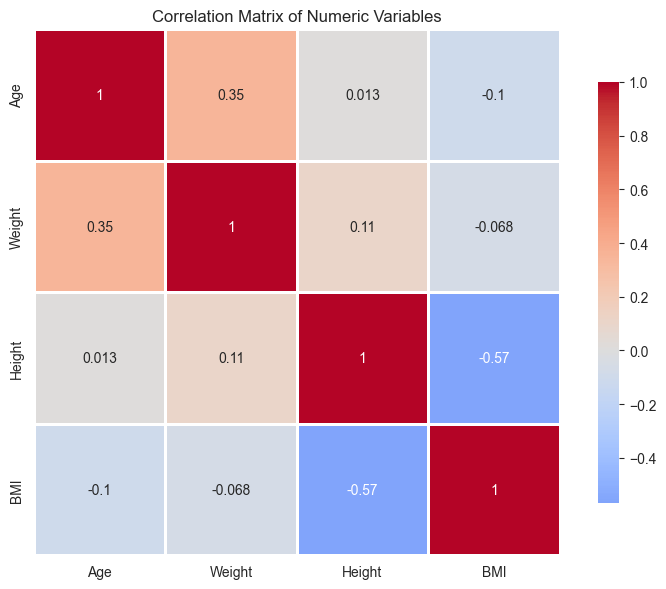

In [14]:
# Correlation analysis
print("Correlation Matrix:")
numeric_cols = ['Age', 'Weight', 'Height', 'BMI']
correlation_matrix = df_clean[numeric_cols].corr()
print(correlation_matrix)

# Visualize correlation matrix
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, 
            square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Correlation Matrix of Numeric Variables')
plt.tight_layout()
plt.show()

### 7. Data Visualization

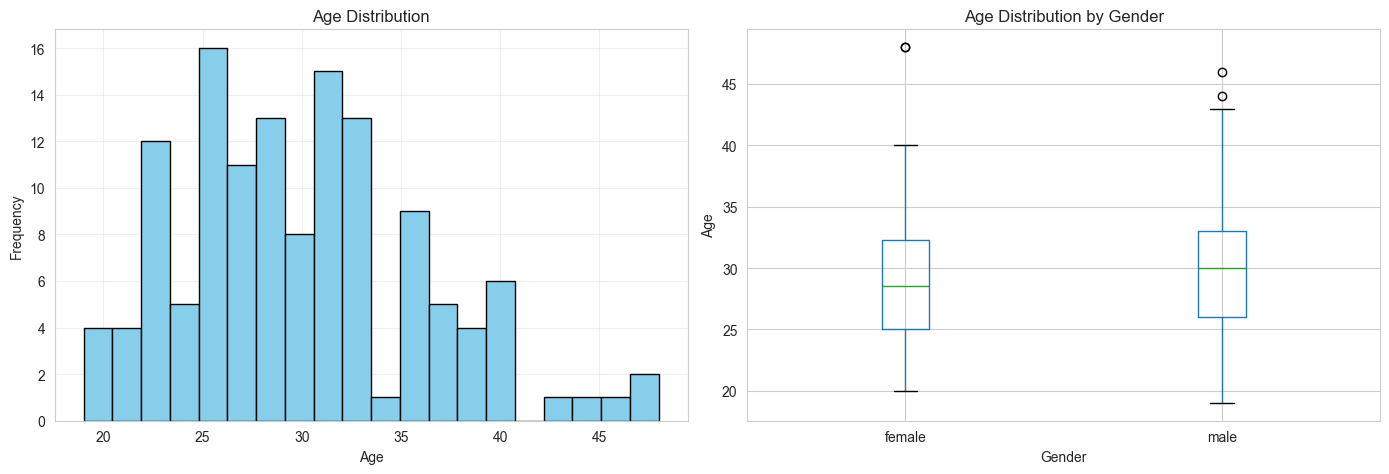

In [15]:
# Age distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_clean['Age'].dropna(), bins=20, color='skyblue', edgecolor='black')
axes[0].set_xlabel('Age')
axes[0].set_ylabel('Frequency')
axes[0].set_title('Age Distribution')
axes[0].grid(True, alpha=0.3)

# Box plot by gender
df_clean.boxplot(column='Age', by='Gender', ax=axes[1])
axes[1].set_title('Age Distribution by Gender')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Age')

plt.suptitle('')
plt.tight_layout()
plt.show()

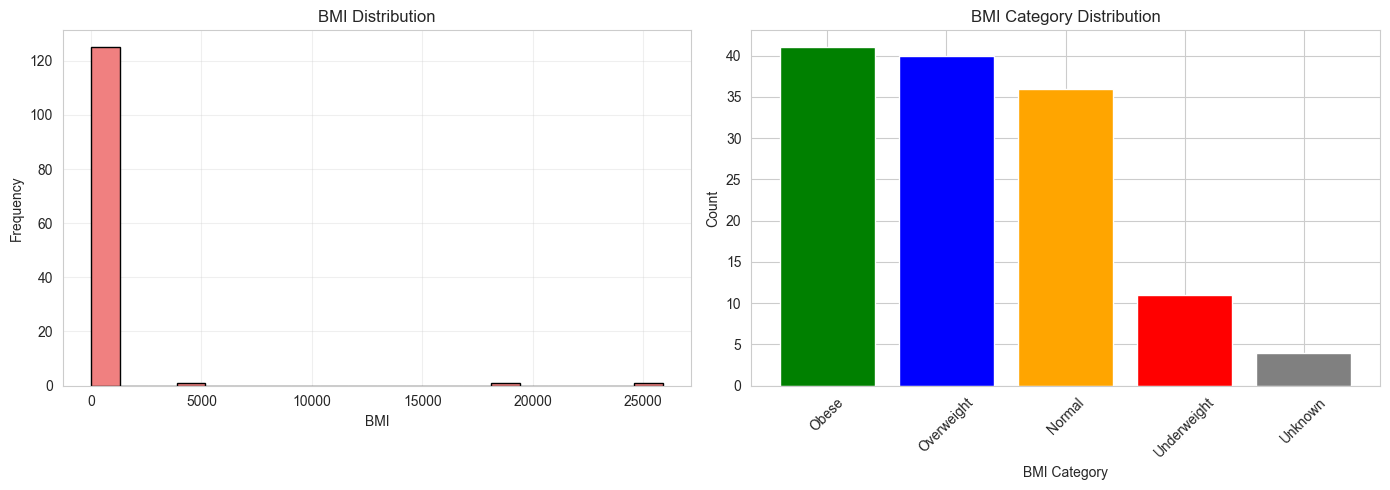

In [16]:
# BMI distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Histogram
axes[0].hist(df_clean['BMI'].dropna(), bins=20, color='lightcoral', edgecolor='black')
axes[0].set_xlabel('BMI')
axes[0].set_ylabel('Frequency')
axes[0].set_title('BMI Distribution')
axes[0].grid(True, alpha=0.3)

# BMI Category distribution
bmi_counts = df_clean['BMI_Category'].value_counts()
axes[1].bar(bmi_counts.index, bmi_counts.values, color=['green', 'blue', 'orange', 'red', 'gray'])
axes[1].set_xlabel('BMI Category')
axes[1].set_ylabel('Count')
axes[1].set_title('BMI Category Distribution')
axes[1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

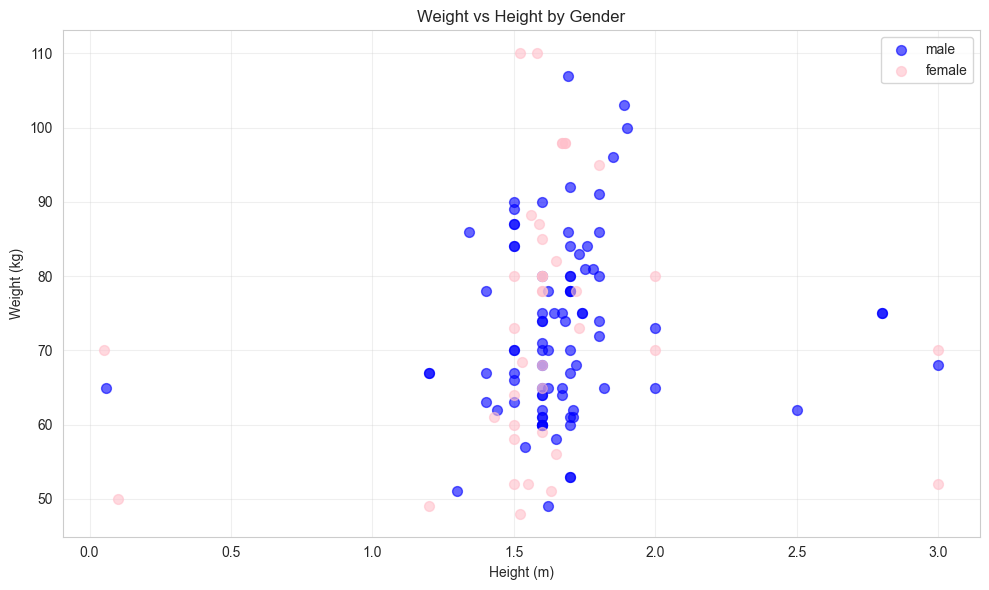

In [17]:
# Weight vs Height scatter plot
plt.figure(figsize=(10, 6))
colors = {'male': 'blue', 'female': 'pink'}
for gender in df_clean['Gender'].unique():
    if pd.notna(gender):
        subset = df_clean[df_clean['Gender'] == gender]
        plt.scatter(subset['Height'], subset['Weight'], 
                   label=gender, alpha=0.6, s=50, color=colors.get(gender, 'gray'))

plt.xlabel('Height (m)')
plt.ylabel('Weight (kg)')
plt.title('Weight vs Height by Gender')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

/var/folders/ws/5yhyzg_56qbfqs_drrgggh4m0000gp/T/ipykernel_84999/1451837316.py:29: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  axes[1, 1].boxplot(gender_groups, labels=df_clean_no_na['Gender'].unique())


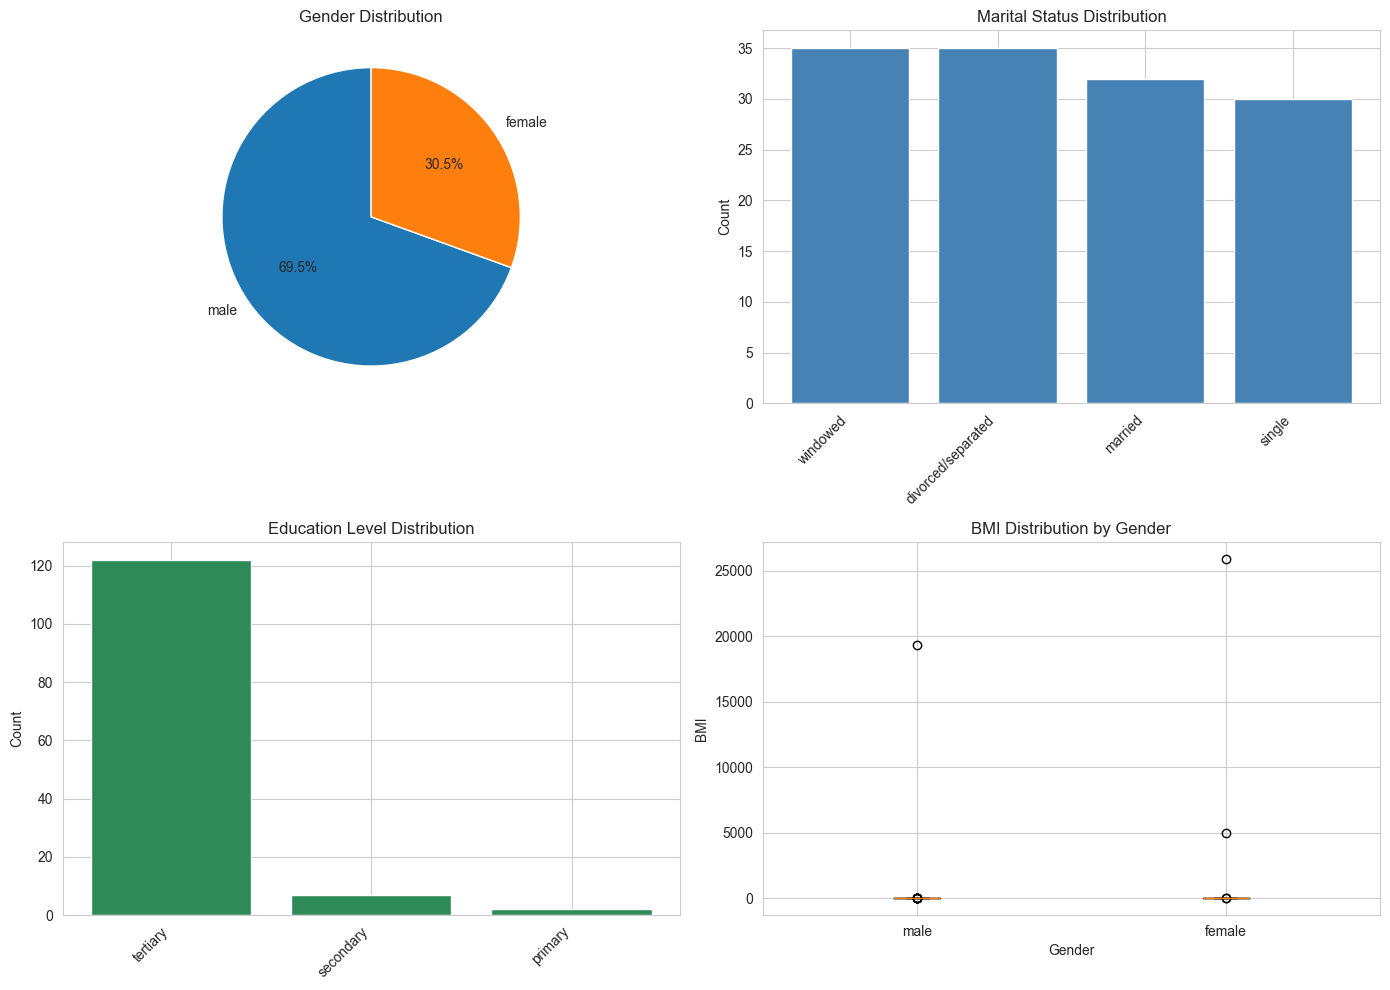

In [18]:
# Demographic distributions
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Gender distribution
gender_counts = df_clean['Gender'].value_counts()
axes[0, 0].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[0, 0].set_title('Gender Distribution')

# Marital status distribution
marital_counts = df_clean['MaritalStatus'].value_counts()
axes[0, 1].bar(range(len(marital_counts)), marital_counts.values, color='steelblue')
axes[0, 1].set_xticks(range(len(marital_counts)))
axes[0, 1].set_xticklabels(marital_counts.index, rotation=45, ha='right')
axes[0, 1].set_title('Marital Status Distribution')
axes[0, 1].set_ylabel('Count')

# Education distribution
education_counts = df_clean['Education'].value_counts()
axes[1, 0].bar(range(len(education_counts)), education_counts.values, color='seagreen')
axes[1, 0].set_xticks(range(len(education_counts)))
axes[1, 0].set_xticklabels(education_counts.index, rotation=45, ha='right')
axes[1, 0].set_title('Education Level Distribution')
axes[1, 0].set_ylabel('Count')

# BMI by Gender
df_clean_no_na = df_clean.dropna(subset=['Gender', 'BMI'])
gender_groups = [df_clean_no_na[df_clean_no_na['Gender'] == g]['BMI'].values 
                 for g in df_clean_no_na['Gender'].unique()]
axes[1, 1].boxplot(gender_groups, labels=df_clean_no_na['Gender'].unique())
axes[1, 1].set_title('BMI Distribution by Gender')
axes[1, 1].set_ylabel('BMI')
axes[1, 1].set_xlabel('Gender')

plt.tight_layout()
plt.show()

### 8. Save Processed Data

In [19]:
# Save the processed data
output_path = 'data_clearance/output_processed.csv'
df_clean.to_csv(output_path, index=False)
print(f"Processed data saved to: {output_path}")

# Display summary
print(f"\nProcessed Dataset Summary:")
print(f"Total records: {len(df_clean)}")
print(f"Columns: {', '.join(df_clean.columns)}")
print(f"\nData types:")
print(df_clean.dtypes)

Processed data saved to: data_clearance/output_processed.csv

Processed Dataset Summary:
Total records: 132
Columns: Age, MaritalStatus, Gender, Education, Weight, Height, BMI, BMI_Category

Data types:
Age              float64
MaritalStatus     object
Gender            object
Education         object
Weight           float64
Height           float64
BMI              float64
BMI_Category      object
dtype: object


### 9. Final Summary Report

In [20]:
# Generate comprehensive summary report
print("="*80)
print("BIOMEDICAL DATA PROCESSING - FINAL REPORT")
print("="*80)

print(f"\n1. DATASET OVERVIEW")
print(f"   - Total Records: {len(df_clean)}")
print(f"   - Total Variables: {len(df_clean.columns)}")
print(f"   - Date Processed: {pd.Timestamp.now().strftime('%Y-%m-%d %H:%M:%S')}")

print(f"\n2. DATA QUALITY")
print(f"   - Records with complete data: {df_clean.dropna().shape[0]} ({df_clean.dropna().shape[0]/len(df_clean)*100:.1f}%)")
print(f"   - Records with missing values: {len(df_clean) - df_clean.dropna().shape[0]}")

print(f"\n3. DEMOGRAPHIC SUMMARY")
print(f"   - Age Range: {df_clean['Age'].min():.0f} - {df_clean['Age'].max():.0f} years")
print(f"   - Mean Age: {df_clean['Age'].mean():.1f} years")
print(f"   - Gender Distribution:")
for gender, count in df_clean['Gender'].value_counts().items():
    print(f"     * {gender}: {count} ({count/len(df_clean)*100:.1f}%)")

print(f"\n4. HEALTH METRICS")
print(f"   - Mean Weight: {df_clean['Weight'].mean():.1f} kg")
print(f"   - Mean Height: {df_clean['Height'].mean():.2f} m")
print(f"   - Mean BMI: {df_clean['BMI'].mean():.1f}")
print(f"   - BMI Categories:")
for category, count in df_clean['BMI_Category'].value_counts().items():
    print(f"     * {category}: {count} ({count/len(df_clean)*100:.1f}%)")

print(f"\n5. OUTPUT")
print(f"   - Processed file: {output_path}")
print(f"   - Jupyter notebook: process_data.ipynb")

print("\n" + "="*80)
print("Processing completed successfully!")
print("="*80)

BIOMEDICAL DATA PROCESSING - FINAL REPORT

1. DATASET OVERVIEW
   - Total Records: 132
   - Total Variables: 8
   - Date Processed: 2026-01-28 23:14:01

2. DATA QUALITY
   - Records with complete data: 128 (97.0%)
   - Records with missing values: 4

3. DEMOGRAPHIC SUMMARY
   - Age Range: 19 - 48 years
   - Mean Age: 30.0 years
   - Gender Distribution:
     * male: 91 (68.9%)
     * female: 40 (30.3%)

4. HEALTH METRICS
   - Mean Weight: 72.7 kg
   - Mean Height: 1.65 m
   - Mean BMI: 419.0
   - BMI Categories:
     * Obese: 41 (31.1%)
     * Overweight: 40 (30.3%)
     * Normal: 36 (27.3%)
     * Underweight: 11 (8.3%)
     * Unknown: 4 (3.0%)

5. OUTPUT
   - Processed file: data_clearance/output_processed.csv
   - Jupyter notebook: process_data.ipynb

Processing completed successfully!
